In [19]:
import pickle
from deap import tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [50]:
enemy_id = 1
runs = 10

In [55]:
logbooks_b = []
logbooks_r = []

for run in range(runs):
    print(run)

    with open(f'logBook/biased/enemy_{enemy_id}/logBook_run_{run}.pkl', 'rb') as f:
        logBook = pickle.load(f)

    logBook = pd.DataFrame.from_dict(logBook)
    logBook['run'] = f'{run}'

    logbooks_b.extend([logBook])

    with open(f'logBook/random/enemy_{enemy_id}/logBook_run_{run}.pkl', 'rb') as f:
        logBook = pickle.load(f)

    logBook = pd.DataFrame.from_dict(logBook)
    logBook['run'] = f'{run}'

    logbooks_r.extend([logBook])

logbook_biased = pd.concat(logbooks_b)
logbook_random = pd.concat(logbooks_r)

0


In [56]:
logbook_biased.describe()

,gen,mean,std,max
count,40.000000,40.000000,40.000000,40.000000
mean,19.500000,48.252966,22.121290,71.656669
std,11.690452,13.362413,2.815888,5.936023
min,0.000000,7.616853,16.056414,57.266659
25%,9.750000,42.757463,20.554853,66.752976
50%,19.500000,51.247532,22.683058,75.075873
75%,29.250000,58.416367,24.162056,75.094638
max,39.000000,64.023235,26.574494,75.721885


In [57]:
logbook_random.describe()

,gen,mean,std,max
count,40.000000,40.000000,40.000000,40.000000
mean,19.500000,52.008670,27.435672,81.179830
std,11.690452,18.317089,5.050265,11.620709
min,0.000000,2.161525,12.997460,57.601837
25%,9.750000,44.006067,24.456150,66.701683
50%,19.500000,52.681806,27.612633,86.316796
75%,29.250000,67.385409,31.757251,86.316796
max,39.000000,77.581199,35.258866,94.023266


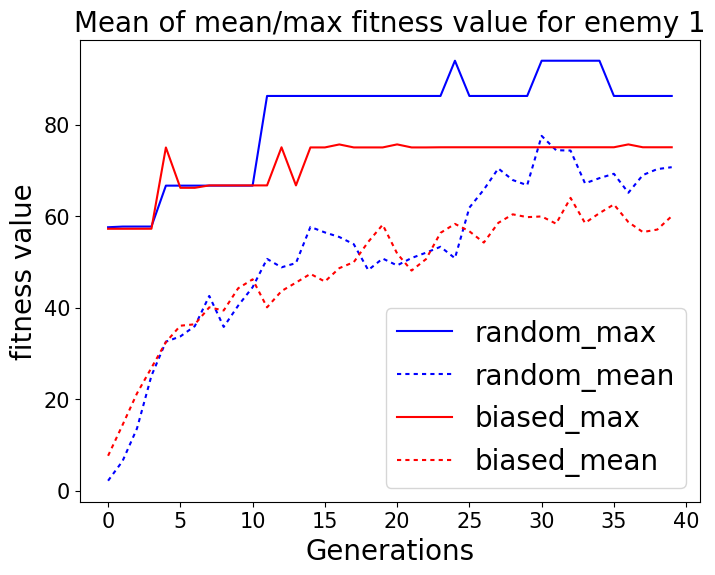

In [58]:
plt.rcParams['figure.figsize'] = (8, 6)

enemy_1_plot = sns.lineplot(data=logbook_random, x='gen', y='max', errorbar='sd', \
    color='b', label='random_max')
enemy_1_plot = sns.lineplot(data=logbook_random, x='gen', y='mean', errorbar='sd', \
    color='b', label='random_mean', dashes=[2,2], err_style='band')
enemy_1_plot = sns.lineplot(data=logbook_biased, x='gen', y='max', errorbar='sd', \
    color='r', label='biased_max')
enemy_1_plot = sns.lineplot(data=logbook_biased, x='gen', y='mean', errorbar='sd', \
    color='r', label='biased_mean', dashes=[2,2], err_style='band')

enemy_1_plot.set_xlabel('Generations', fontsize=20)
enemy_1_plot.set_ylabel('fitness value', fontsize=20)
enemy_1_plot.axes.set_title('Mean of mean/max fitness value for enemy 1', fontsize=20)
enemy_1_plot.tick_params(labelsize=15)
plt.legend(fontsize=20, loc='lower right')

fig_1 = enemy_1_plot.get_figure()
fig_1.savefig('lineplot_figures/enemy_1_mean.svg', bbox_inches='tight')
